In [102]:
#Importing libraries
import numpy as np
import pandas as pd
import plotly
import IPython.display
import seaborn as sns
import matplotlib.pyplot as plt 

In [117]:
df = pd.read_csv('/home/francis/Downloads/owid-covid-data.csv',parse_dates=['date'])
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [118]:
df.drop(['new_cases_smoothed','iso_code','icu_patients_per_million',], axis=1, inplace=True)

In [119]:
df.head()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,0.126,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,0.126,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,0.126,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,0.126,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,0.126,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [120]:
Kenya = df[df['location'] == 'Kenya']
print(Kenya)

      continent location       date  total_cases  new_cases  total_deaths  \
82322    Africa    Kenya 2020-03-06          NaN        NaN           NaN   
82323    Africa    Kenya 2020-03-07          NaN        NaN           NaN   
82324    Africa    Kenya 2020-03-08          NaN        NaN           NaN   
82325    Africa    Kenya 2020-03-09          NaN        NaN           NaN   
82326    Africa    Kenya 2020-03-10          NaN        NaN           NaN   
...         ...      ...        ...          ...        ...           ...   
83071    Africa    Kenya 2022-03-25     323350.0       17.0        5647.0   
83072    Africa    Kenya 2022-03-26     323365.0       15.0        5647.0   
83073    Africa    Kenya 2022-03-27     323374.0        9.0        5647.0   
83074    Africa    Kenya 2022-03-28     323383.0        9.0        5647.0   
83075    Africa    Kenya 2022-03-29     323395.0       12.0        5648.0   

       new_deaths  new_deaths_smoothed  total_cases_per_million  \
82322   

In [121]:
Kenya.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754 entries, 82322 to 83075
Data columns (total 64 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   continent                                   754 non-null    object        
 1   location                                    754 non-null    object        
 2   date                                        754 non-null    datetime64[ns]
 3   total_cases                                 747 non-null    float64       
 4   new_cases                                   747 non-null    float64       
 5   total_deaths                                734 non-null    float64       
 6   new_deaths                                  734 non-null    float64       
 7   new_deaths_smoothed                         728 non-null    float64       
 8   total_cases_per_million                     747 non-null    float64       
 9   new_

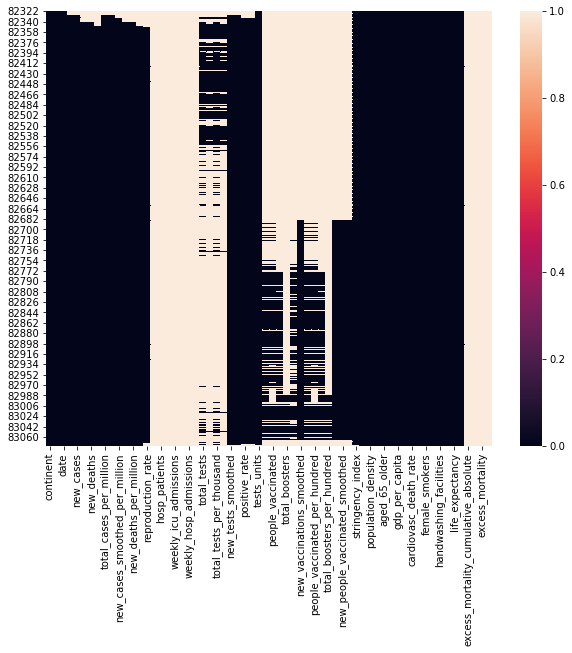

In [122]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(Kenya.isnull(),cbar=True,ax=ax)

In [123]:
Kenya.drop(['icu_patients','weekly_icu_admissions','weekly_hosp_admissions','hosp_patients_per_million','hosp_patients','excess_mortality','excess_mortality_cumulative_per_million','excess_mortality_cumulative','excess_mortality_cumulative_absolute','weekly_icu_admissions_per_million','weekly_hosp_admissions_per_million'], axis=1, inplace=True)

/home/francis/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


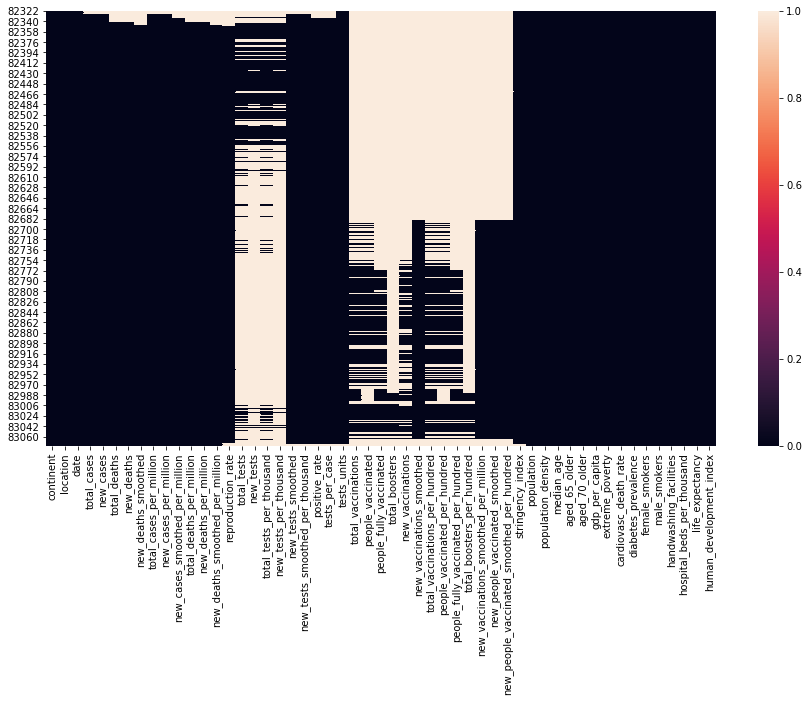

In [124]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(Kenya.isnull(),cbar=True,ax=ax)

In [125]:
Kenya.fillna(0,inplace=True)

/home/francis/.local/lib/python3.8/site-packages/pandas/core/frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [126]:
Kenya.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754 entries, 82322 to 83075
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   continent                                   754 non-null    object        
 1   location                                    754 non-null    object        
 2   date                                        754 non-null    datetime64[ns]
 3   total_cases                                 754 non-null    float64       
 4   new_cases                                   754 non-null    float64       
 5   total_deaths                                754 non-null    float64       
 6   new_deaths                                  754 non-null    float64       
 7   new_deaths_smoothed                         754 non-null    float64       
 8   total_cases_per_million                     754 non-null    float64       
 9   new_

In [127]:
total_cases = df[['date','total_cases']]
total_cases.tail()

,date,total_cases
172038,2022-03-25,245645.0
172039,2022-03-26,245645.0
172040,2022-03-27,245820.0
172041,2022-03-28,245927.0
172042,2022-03-29,246042.0


[Text(0.5, 1.0, 'Trend on total Covid cases in Kenya from February-2020 to March-2022')]

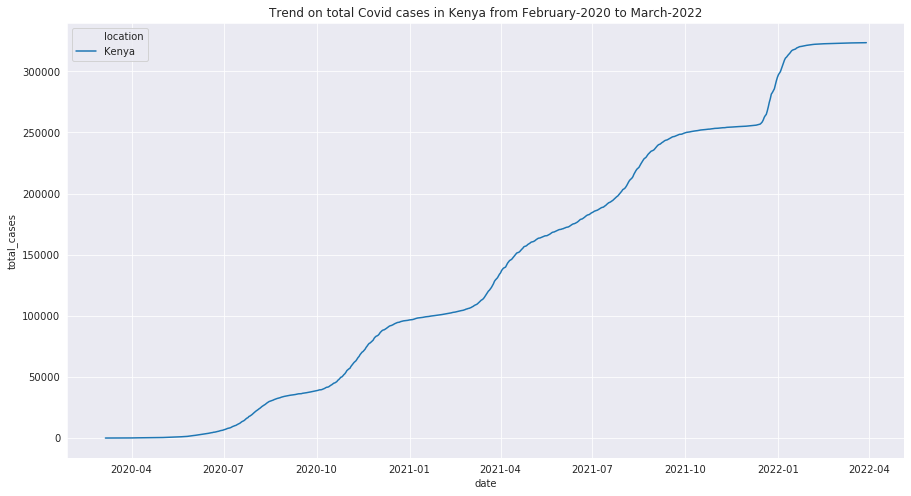

In [139]:
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
sns.lineplot(x='date',y='total_cases',data=Kenya, hue='location').set(title='Trend on total Covid cases in Kenya from February-2020 to March-2022')

[Text(0.5, 1.0, 'Trend on new Covid19 cases upto 24th March 2022')]

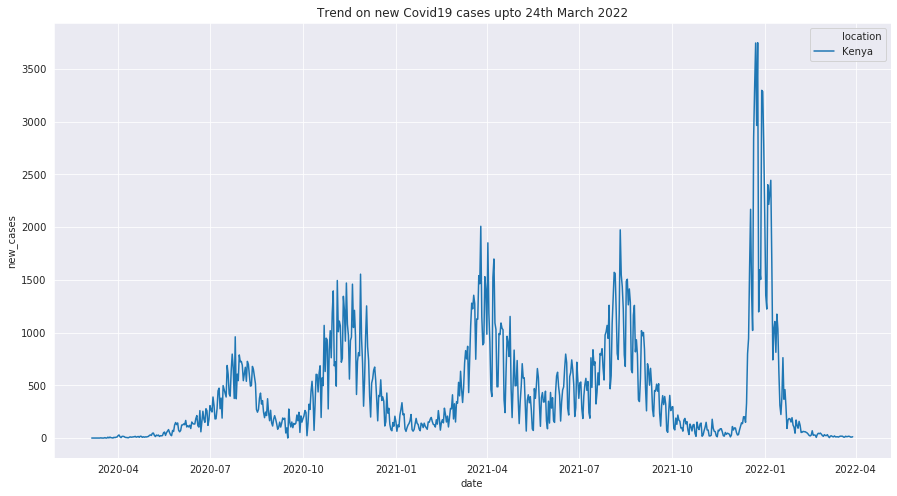

In [142]:
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
sns.lineplot(x='date',y='new_cases',data= Kenya,hue='location').set(title="Trend on new Covid19 cases upto 24th March 2022")

[Text(0.5, 1.0, 'Trend on deaths due to Covid19 up to the 24th of March 2022')]

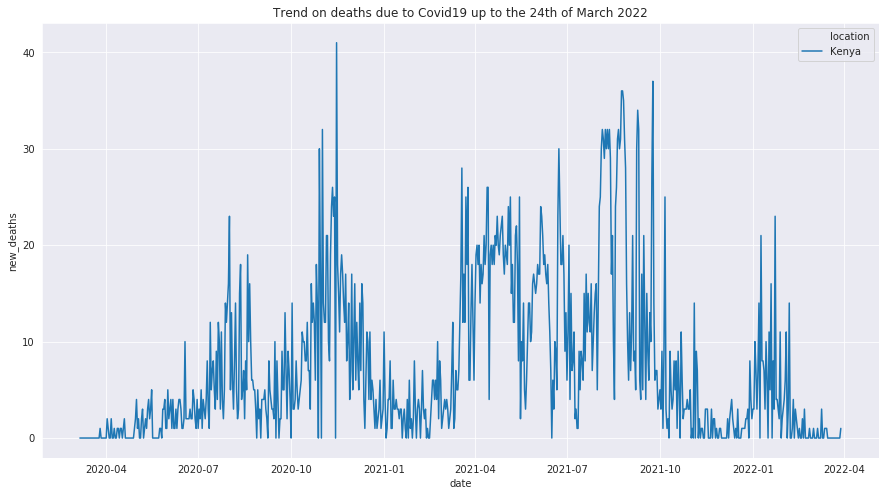

In [145]:
# plotting death cases
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
sns.lineplot(x='date',y='new_deaths',hue='location',data=Kenya).set(title="Trend on deaths due to Covid19 up to the 24th of March 2022")

[Text(0.5, 1.0, 'Trend on Testing_rate for Covid19 up to the 24th of March 2022')]

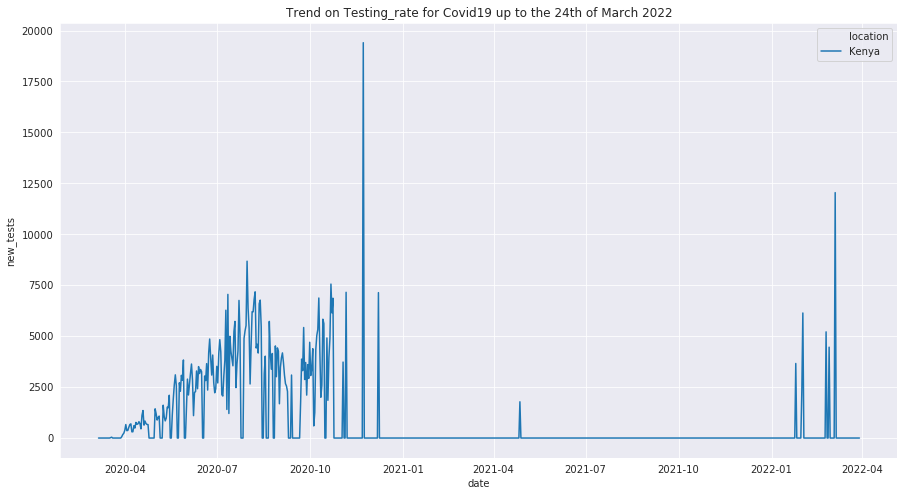

In [147]:
# plotting for the testing rate
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
sns.lineplot(x='date',y='new_tests',hue='location',data=Kenya).set(title="Trend on Testing_rate for Covid19 up to the 24th of March 2022")

[Text(0.5, 1.0, 'Trend on Positive rate for Covid19 up to the 24th of March 2022')]

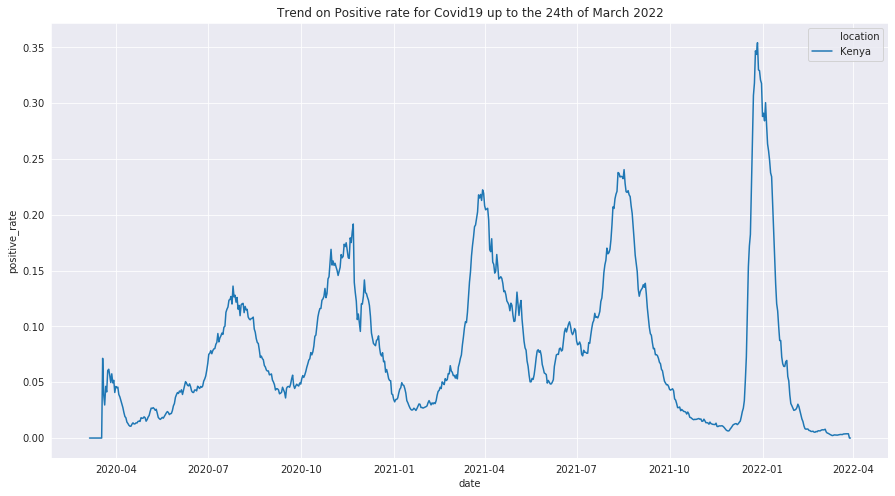

In [148]:
# plotting for the testing rate
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
sns.lineplot(x='date',y='positive_rate',hue='location',data=Kenya).set(title="Trend on Positive rate for Covid19 up to the 24th of March 2022")

[Text(0.5, 1.0, 'Trend on new vaccination against Covid19 up to the 24th of March 2022')]

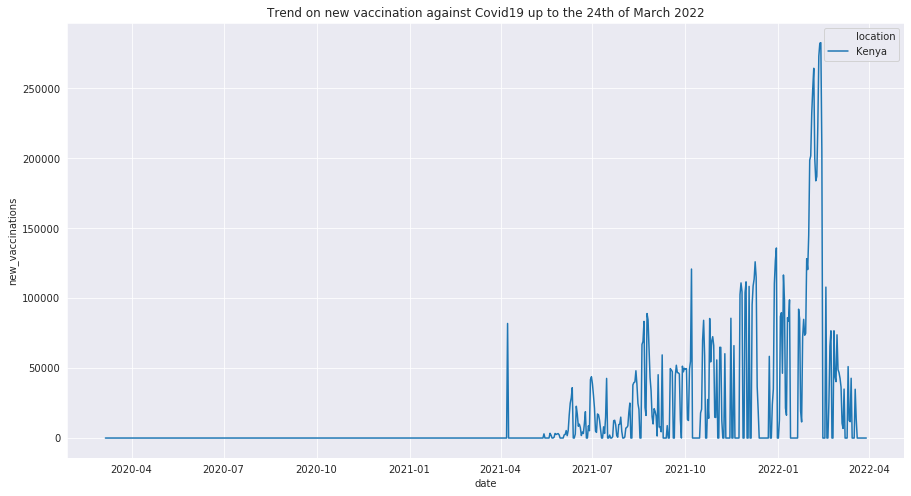

In [149]:
# plotting for the testing rate
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
sns.lineplot(x='date',y='new_vaccinations',hue='location',data=Kenya).set(title="Trend on new vaccinations against Covid19 up to the 24th of March 2022")

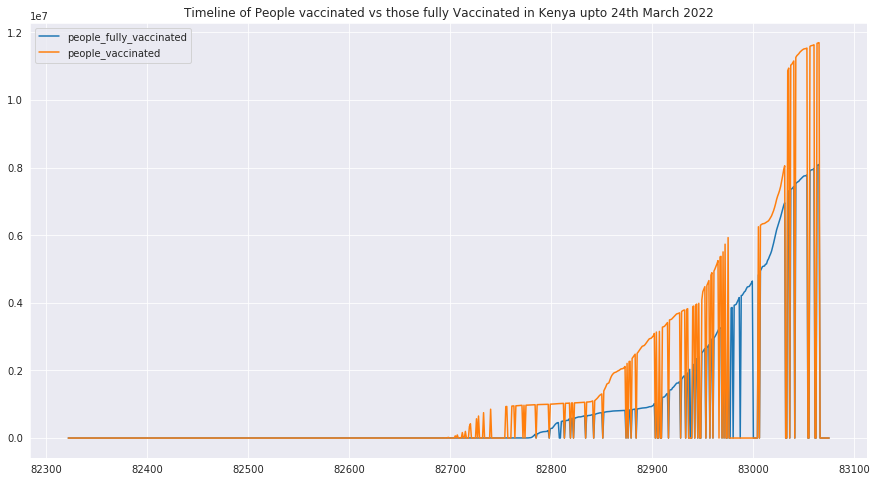

In [153]:
# plotting the people vaccinated vs people fully vaccinated
Kenya[['people_fully_vaccinated','people_vaccinated']].plot(figsize=(15,8),title='Timeline of People vaccinated vs those fully Vaccinated in Kenya upto 24th March 2022')
